<a id='top'></a>

In [1]:
%load_ext watermark
%watermark -a 'Author: James Bourbeau' -u -d -v -p numpy,matplotlib,sklearn,mlxtend

Author: James Bourbeau 
last updated: 2017-03-21 

CPython 3.6.0
IPython 5.1.0

numpy 1.12.0
matplotlib 2.0.0
sklearn 0.18.1
mlxtend 0.5.1


# X-meeting machine learning example
### Table of contents
1. [Generate classification dataset](#Generate-classification-dataset)
2. [Random forest classification](#Random-forest-classification)
3. [Hyperparameter tuning](#Hyperparameter-tuning)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

## Generate classification dataset

[ [back to top](#top) ]

I'll use scikit-learn's `make_blobs` function to generate a random dataset that contains 2 features and 3 target variables. I'll choose parameters such that the generated dataset has one class that is well-isolated from the other two classes. 

In [3]:
centers = [[1, 1], [3, 3], [-2, -2]]
cluster_std = [1, 1, 0.5]
X, y = datasets.make_blobs(n_samples=200, centers=centers, n_features=2, cluster_std=cluster_std, random_state=2)

Let's get a look at what are dataset look like by making a scatter plot. 

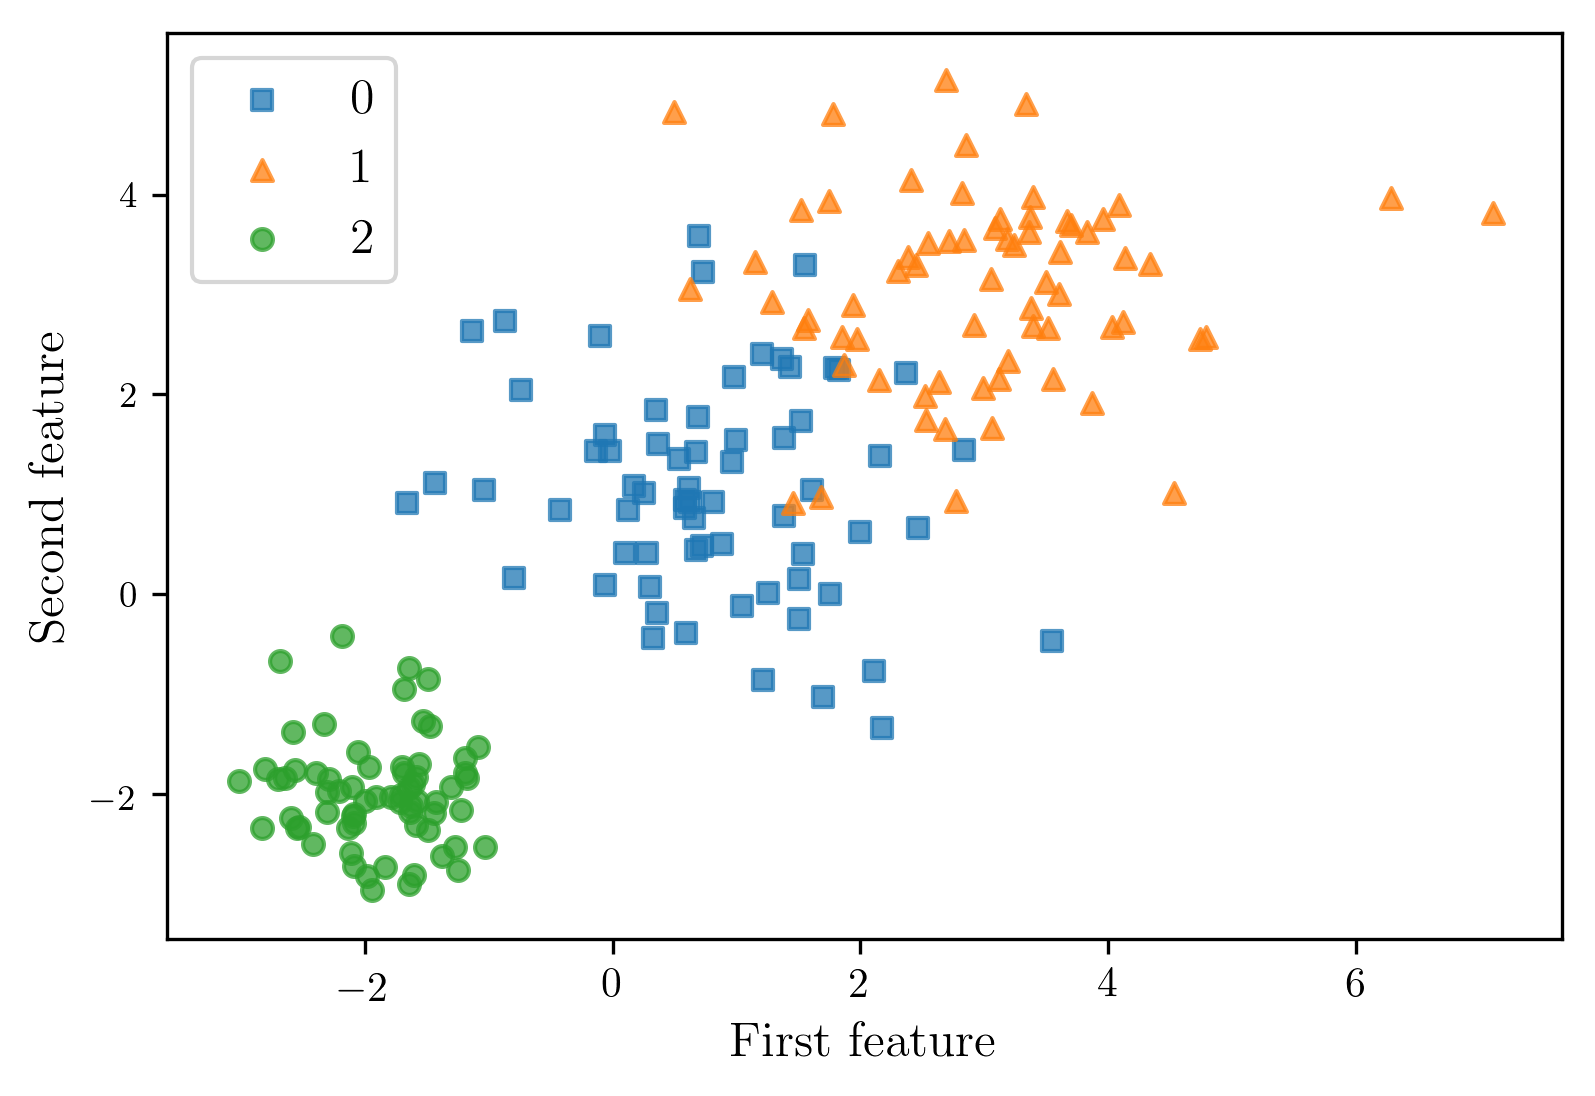

In [4]:
fig, ax = plt.subplots()
for label, color, marker in zip([0, 1, 2], ['C0', 'C1', 'C2'], ['s', '^', 'o']):
    label_mask = y == label
    ax.scatter(X[label_mask,0], X[label_mask,1], color=color, marker=marker, label=label, alpha=0.75)
ax.set_xlabel('First feature')
ax.set_ylabel('Second feature')
ax.legend()
plt.show()

Split dataset into separate testing and training sets 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

## Random forest classification
[ [back to top](#top) ]

In [6]:
clf = RandomForestClassifier(random_state=2)

In [7]:
clf = clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print('Testing accuracy: {:0.2%}'.format(test_acc))
print('Training accuracy: {:0.2%}'.format(train_acc))

Testing accuracy: 91.67%
Training accuracy: 100.00%


The classifier has a much higher classification accuracy on the training set than it does on the testing set. This is because the default hyperparameters are such that the random forest is oveclfitting the testing data.

Let's take a look at the 2-dimensional decision regions.

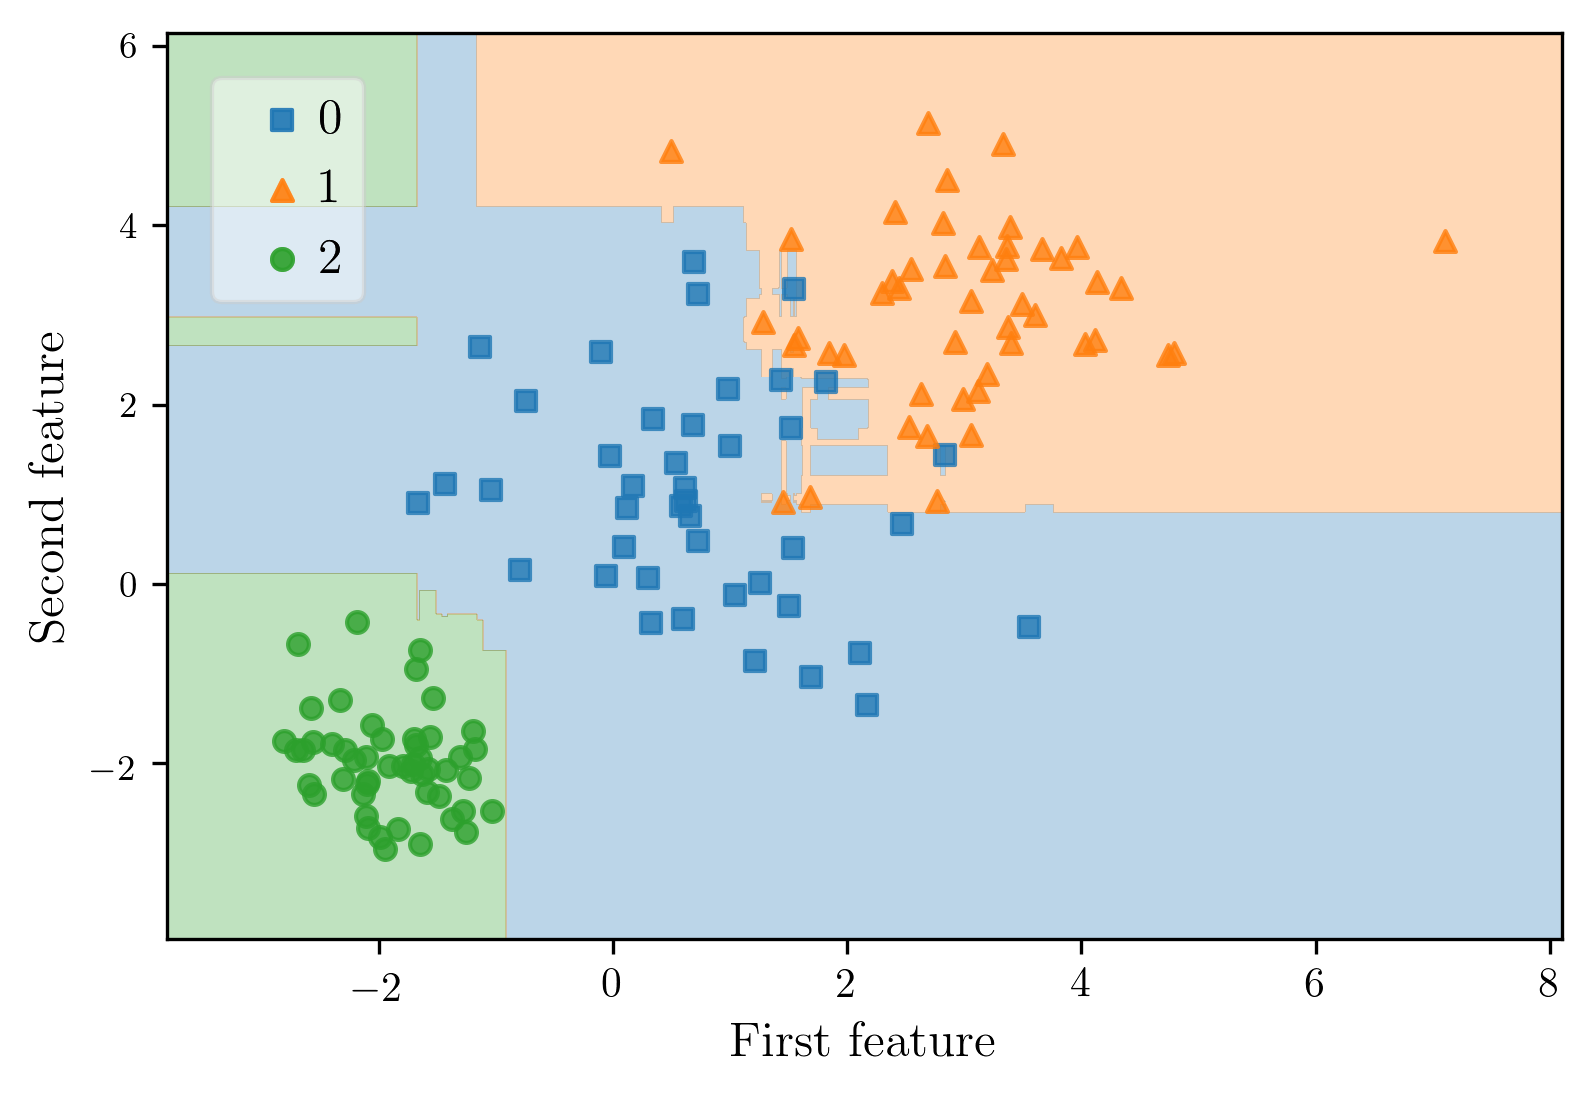

In [8]:
fig, ax = plt.subplots()
plot_decision_regions(X_train[:300], y_train[:300], clf=clf, res=0.01, legend=2,
                      colors='C0,C1,C2', hide_spines=False, ax=ax)
ax.set_xlabel('First feature')
ax.set_ylabel('Second feature')
plt.show()

## Hyperparameter tuning
[ [back to top](#top) ]

We want to choose hyperparameter values to avoid under-/over-fitting. For this example, I'll tune the maximum depth of our random forest classifier via a 10-fold validation curve

In [9]:
param_range = np.arange(1, 16)
train_scores, test_scores = validation_curve(clf, X_train, y_train,
                                param_name='max_depth', param_range=param_range, cv=10,
                                scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

Plot the corresponding validation curve for the maximum tree depth

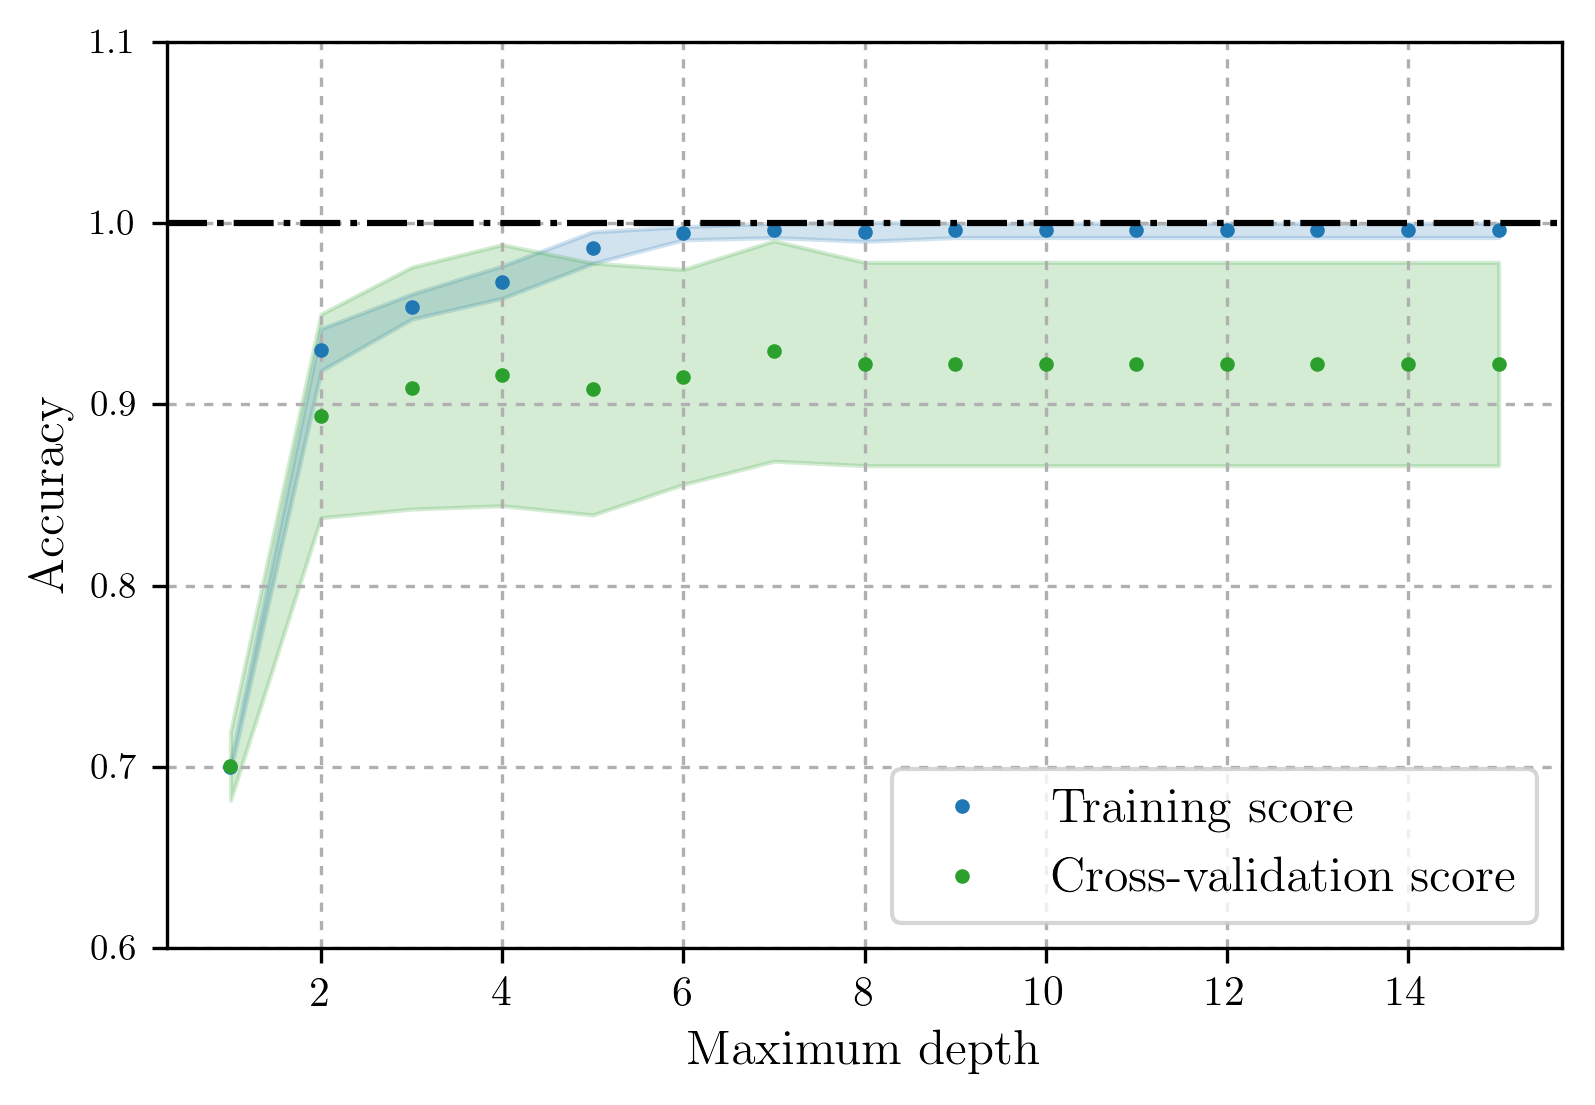

In [10]:
fig, ax = plt.subplots()

ax.plot(param_range, train_scores_mean, label="Training score",
             color='C0')
ax.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color='C0')
ax.plot(param_range, test_scores_mean, label="Cross-validation score",
             color='C2')
ax.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color='C2')
ax.axhline(1, marker='None', ls='-.')
ax.set_xlabel('Maximum depth')
ax.set_ylabel('Accuracy')
# ax.set_xlim(max_depth_range.min()-1, max_depth_range.max()+1)
ax.set_ylim(0.6, 1.1)
ax.grid()
ax.legend(loc='lower right')
plt.show()

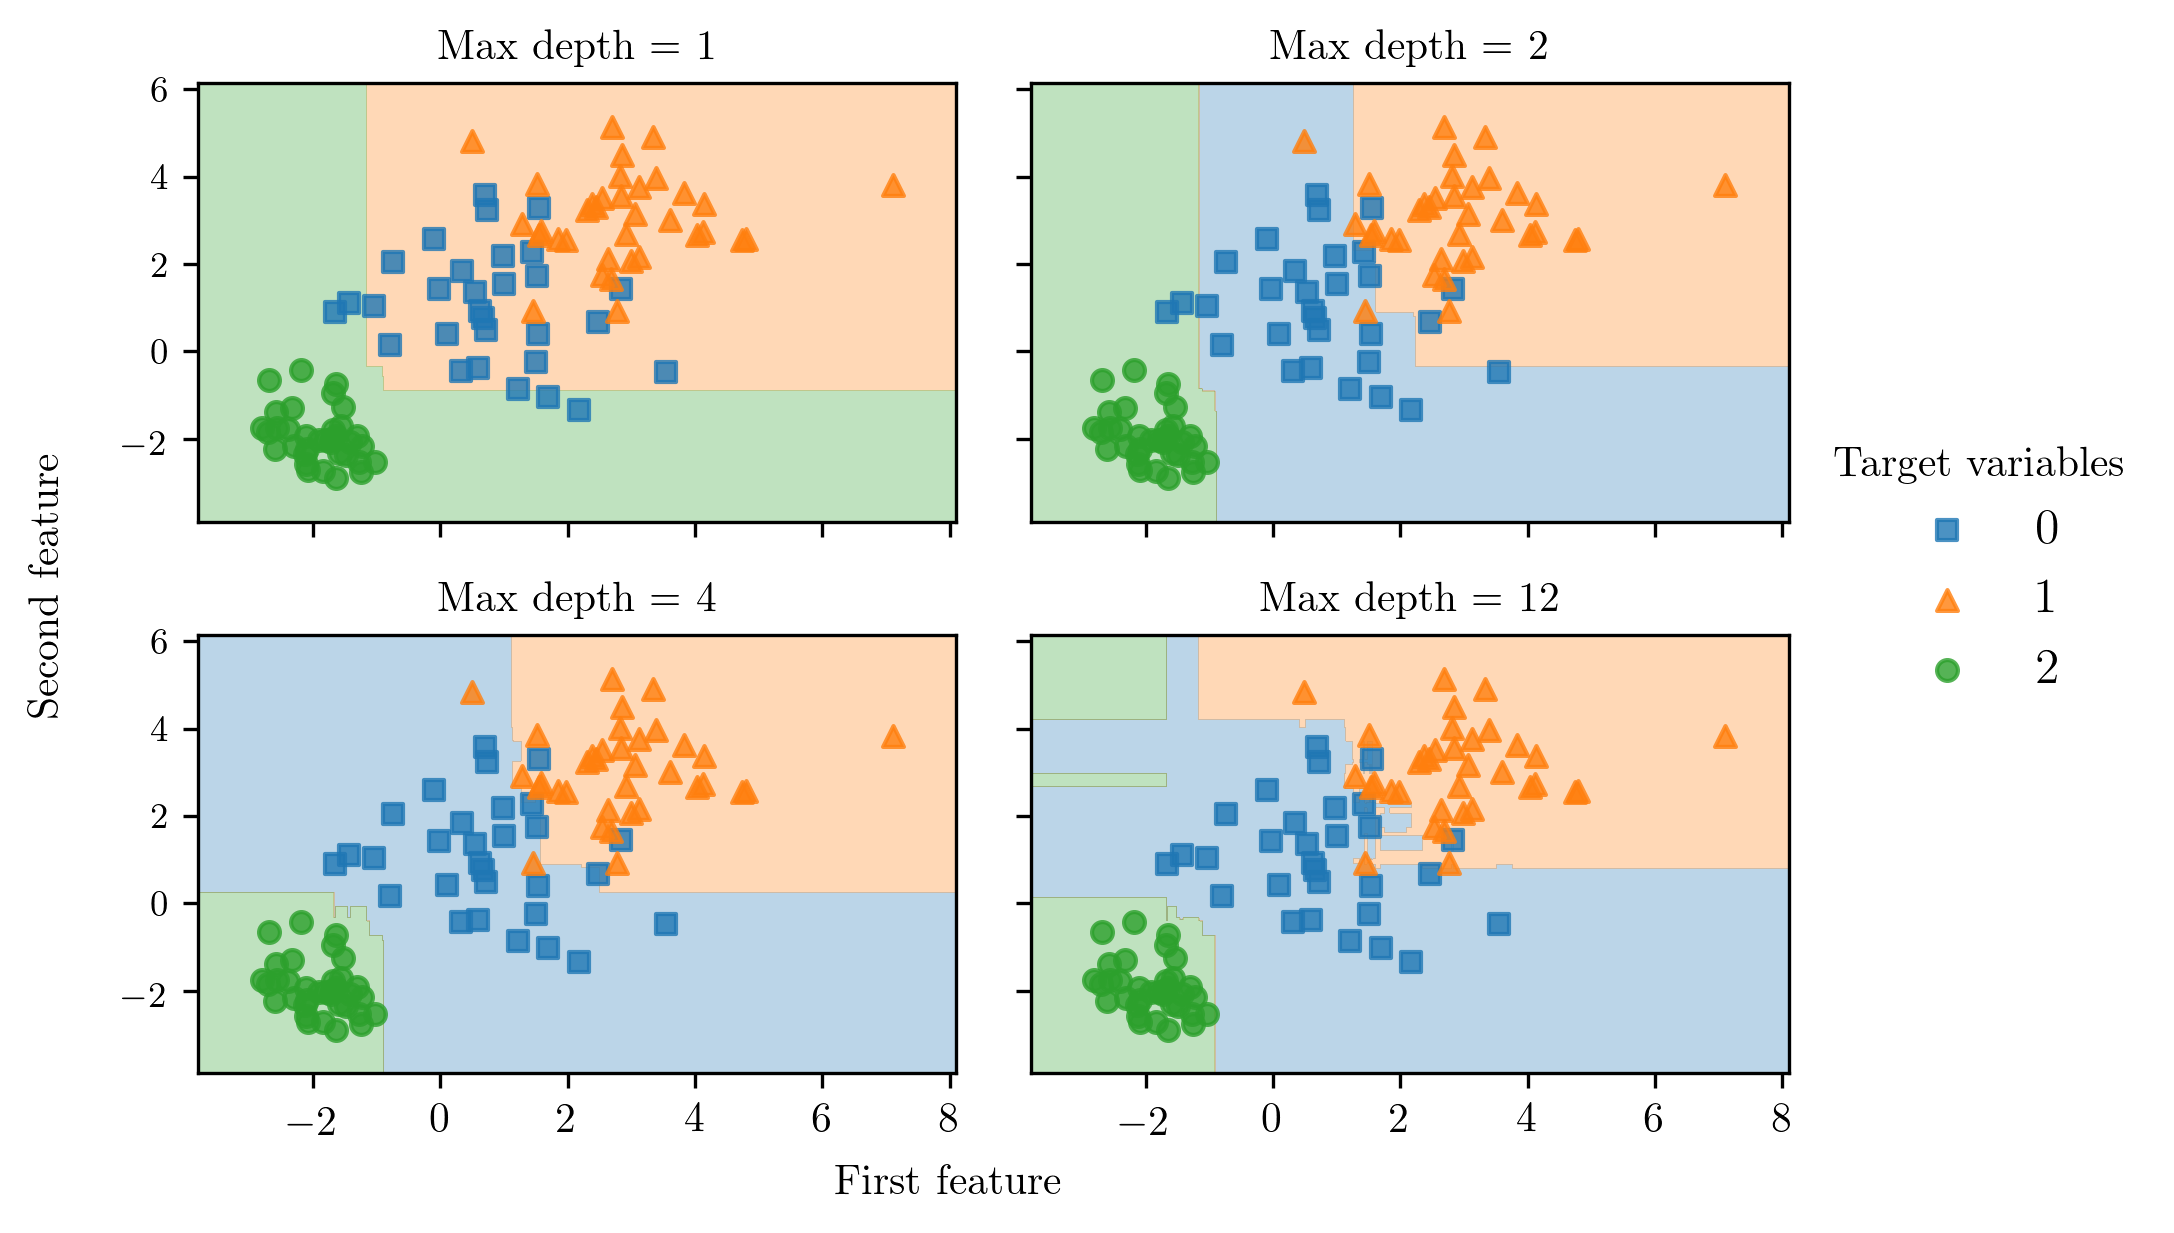

In [11]:
fig, axarr = plt.subplots(2, 2, sharex=True, sharey=True)
for max_depth, ax in zip([1, 2, 4, 12], axarr.flat):
    clf = clf.set_params(max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    plot_decision_regions(X_train[:100], y_train[:100], clf=clf, res=0.01, legend=0,
                               colors='C0,C1,C2', hide_spines=False, ax=ax)
    ax.set_title('Max depth = {}'.format(max_depth))
fig.text(0.5, 0.00, 'First feature', ha='center', va='center')
fig.text(0.0, 0.5, 'Second feature', ha='center', va='center', rotation='vertical')
plt.legend(title='Target variables', loc='center left', frameon=False,
          bbox_to_anchor=(1.,  # horizontal
                          1.15),# vertical 
          ncol=1, fancybox=False)
plt.tight_layout()
plt.show()

In [12]:
clf = clf.set_params(max_depth=4)

In [13]:
clf = clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print('Testing accuracy: {:0.2%}'.format(test_acc))
print('Training accuracy: {:0.2%}'.format(train_acc))

Testing accuracy: 88.33%
Training accuracy: 96.43%


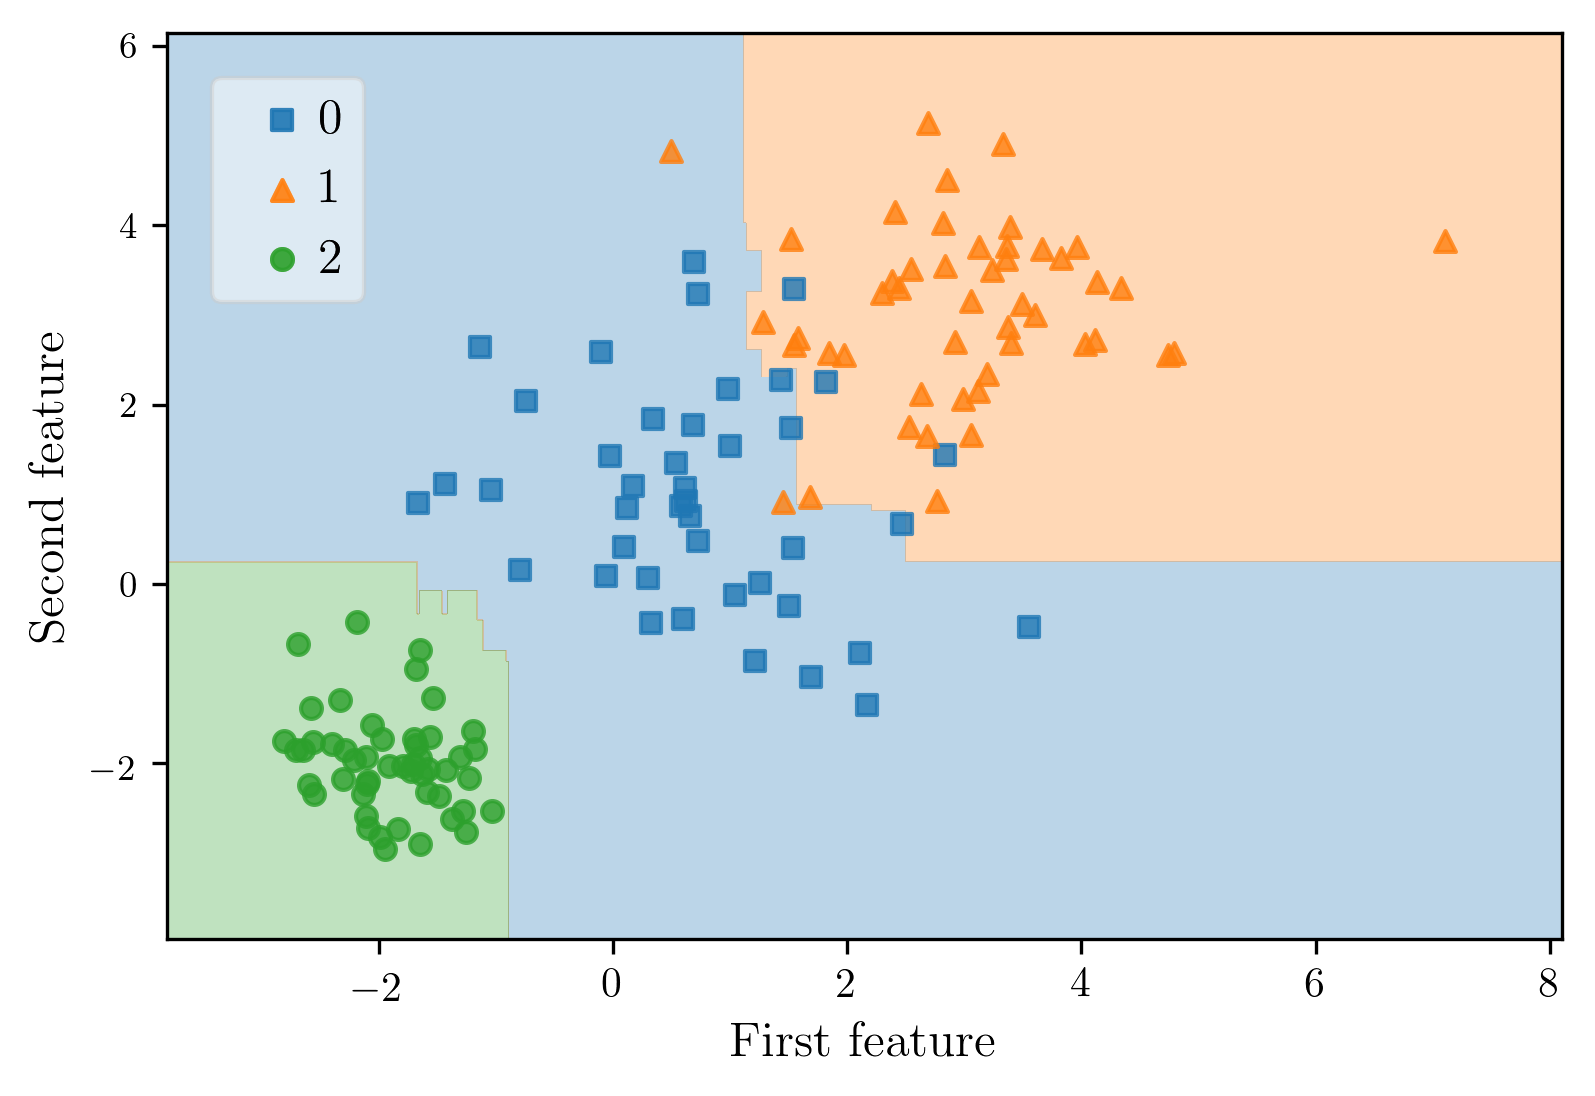

In [14]:
fig, ax = plt.subplots()
plot_decision_regions(X_train, y_train, clf=clf, res=0.01, legend=2,
                      colors='C0,C1,C2', hide_spines=False, X_highlight=X_test, ax=ax)
ax.set_xlabel('First feature')
ax.set_ylabel('Second feature')
plt.show()